# Time Series Analysis and Forecasting with ARIMA

This notebook demonstrates ARIMA modeling on sales data, splitting into training and test sets, and visualizing train, test, and forecast results.

## 1. Import Required Libraries
Import pandas, numpy, matplotlib, statsmodels, and other libraries for time series analysis and ARIMA modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load and Preprocess Sales Data
Load the sales dataset, convert date columns, set index, and handle missing values.

In [2]:
# Load sales data
df = pd.read_csv('sales-data.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('MS')
df['sales'] = df['sales'].interpolate()
df.head()

,sales
date,
2020-01-01,1200
2020-02-01,1150
2020-03-01,1300
2020-04-01,1250
2020-05-01,1400


## 3. Split Data into Training and Test Sets
We will use the last 12 months as the test set and the rest as the training set.

In [3]:
# Split data: last 12 months as test set
test_size = 12
train = df['sales'][:-test_size]
test = df['sales'][-test_size:]
train.tail(), test.head()

(date
 2024-08-01    1650
 2024-09-01    1800
 2024-10-01    1750
 2024-11-01    1900
 2024-12-01    1850
 Freq: MS, Name: sales, dtype: int64,
 date
 2025-01-01    1450
 2025-02-01    1400
 2025-03-01    1550
 2025-04-01    1500
 2025-05-01    1650
 Freq: MS, Name: sales, dtype: int64)

## 4. Fit ARIMA Model and Forecast Test Period
Fit the ARIMA model on the training set and forecast the test period.

In [4]:
# For simplicity, use (p,d,q) = (1,1,1). In practice, use ACF/PACF to select.
p, d, q = 1, 1, 1
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=test_size)
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_series.head()

date
2025-01-01    1907.228247
2025-02-01    1850.000326
2025-03-01    1907.227921
2025-04-01    1850.000652
2025-05-01    1907.227596
Freq: MS, Name: predicted_mean, dtype: float64

## 5. Visualize Train, Test, and Forecast Data
Plot the training, test, and forecasted sales for comparison.

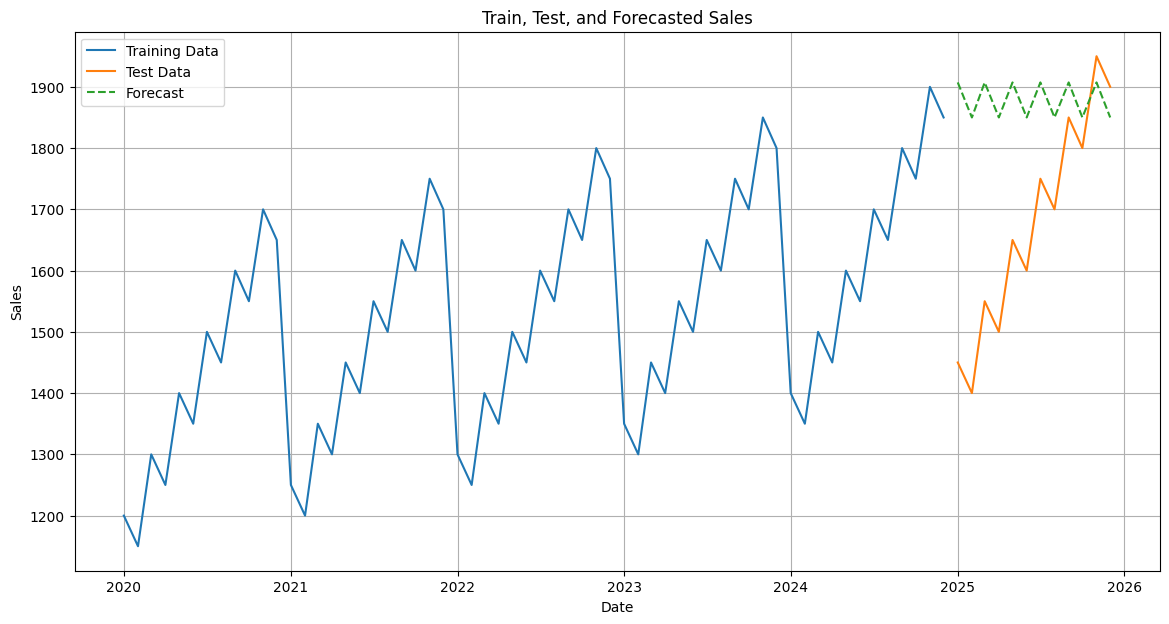

In [5]:
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.title('Train, Test, and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()